In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,No,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [6]:
df.size

1000

In [7]:
df.columns

Index(['No', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.head(5)

,No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.dtypes

No             int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
df.describe()

,No,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df.corr()

,No,TV,Radio,Newspaper,Sales
No,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [14]:
df.isnull().sum()

No           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


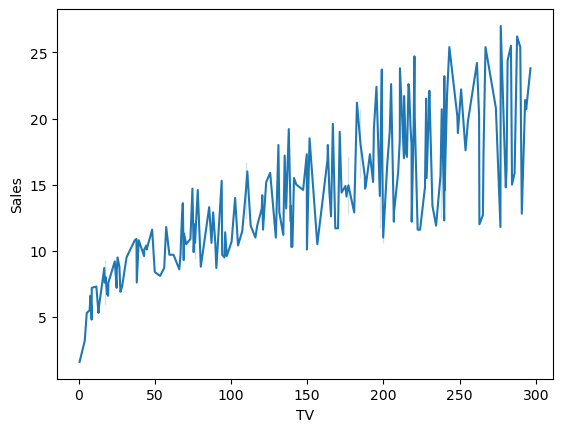

In [51]:
sns.lineplot( x = "TV",
             y = "Sales",
             data = df);


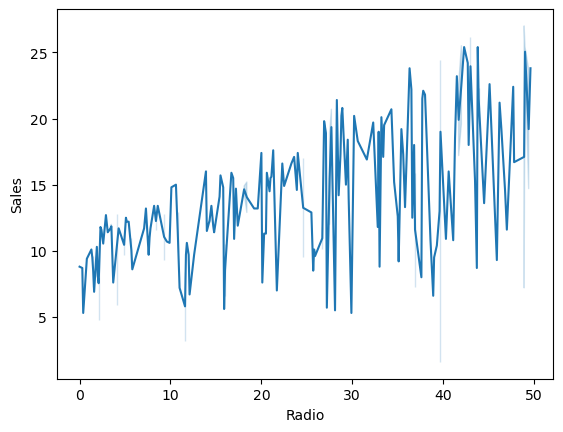

In [52]:
sns.lineplot( x = "Radio",
             y = "Sales",
             data = df);


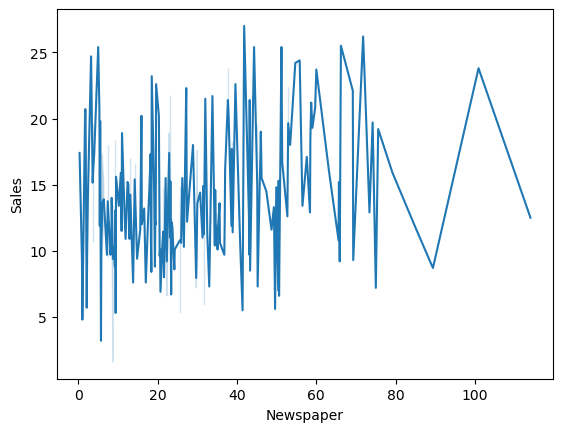

In [53]:
sns.lineplot( x = "Newspaper",
             y = "Sales",
             data = df);


In [29]:
x=df.drop('Sales',axis=1)
x

,No,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [30]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [32]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_predictions=model.predict(X_test)

In [35]:
y_predictions

array([10.24664397,  7.3067958 ,  7.01313011, 24.0629912 , 11.84538583,
        6.3623126 , 12.97367539, 15.01392577, 10.95137181, 16.2302401 ,
       22.94764396,  9.07892877, 10.29830431, 15.372556  , 11.63358138,
       12.38729183, 18.91996453, 10.72601207, 16.03372676, 17.36589369,
       23.85225051,  9.51048184, 15.25366204, 12.2528663 ,  5.81346738,
       15.19998588, 12.12398331, 20.74762723, 13.36651757,  9.16548788,
       13.0430809 , 21.47977498, 18.01828076, 21.14170908,  6.74096317,
        5.9527019 ,  7.82515133, 13.21661502, 14.72150697,  6.18172688])

In [36]:
print(model.intercept_)
print(model.coef_)

3.241969367214139
[-0.00222187  0.0445384   0.1962548  -0.00319076]


In [37]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_predictions.flatten()})
act_predict.head(10)

,Actual,Predict
0,11.3,10.246644
1,8.4,7.306796
2,8.7,7.013130
3,25.4,24.062991
4,11.7,11.845386
5,8.7,6.362313
6,7.2,12.973675
7,13.2,15.013926
8,9.2,10.951372
9,16.6,16.230240


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predictions))
print("Mean_squared_error:",mean_squared_error(y_test,y_predictions))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predictions)))
print("r2_score:",r2_score(y_test,y_predictions))

Mean_absolute_error: 1.4158480868317485
Mean_squared_error: 4.51648782221942
Squre_Mean_absolute_error: 1.1898941494232789
r2_score: 0.856480214327925
